In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from getsig import getsig
from closest import closest
#
plt.style.use('helvet2')

In [2]:
labelstr1=r"$\mathrm{t=2.25s}$""\n"r"$\mathrm{P_{aux}=9.5MW}$""\n"r"$\mathrm{D=1.0e22e/s}$"
labelstr2=r"$\mathrm{t=3.80s}$""\n"r"$\mathrm{P_{aux}=9.5MW}$""\n"r"$\mathrm{D=4.0e22e/s}$"
labelstr3=r"$\mathrm{t=4.80s}$""\n"r"$\mathrm{P_{aux}=15MW}$""\n"r"$\mathrm{D=4.0e22e/s}$"
labelstr4=r"$\mathrm{t=5.50s}$""\n"r"$\mathrm{P_{aux}=15MW}$""\n"r"$\mathrm{D=7.0e22e/s}$"
labelstr5=r"$\mathrm{t=7.00s}$""\n"r"$\mathrm{P_{aux}=12.7MW}$""\n"r"$\mathrm{D=6.5e22e/s}$"
lblstr = [labelstr1,labelstr2,labelstr3,labelstr4,labelstr5]

# ah = np.loadtxt('./Profiles/profile_0_3.30733')
# bh = np.loadtxt('./Profiles/profile_1_3.30733')
# ch = np.loadtxt('./Profiles/profile_2_3.30733')
# dh = np.loadtxt('./Profiles/profile_3_3.30733')
# eh = np.loadtxt('./Profiles/profile_4_3.30733')

# al = np.loadtxt('./Profiles/profile_0_2.30733')
# bl = np.loadtxt('./Profiles/profile_1_2.30733')
# cl = np.loadtxt('./Profiles/profile_2_2.30733')
# dl = np.loadtxt('./Profiles/profile_3_2.30733')
# el = np.loadtxt('./Profiles/profile_4_2.30733')

ah = np.loadtxt('./Profiles/profile_0_3_v2.30733')
bh = np.loadtxt('./Profiles/profile_1_3_v2.30733')
ch = np.loadtxt('./Profiles/profile_2_3_v2.30733')
dh = np.loadtxt('./Profiles/profile_3_3_v2.30733')
eh = np.loadtxt('./Profiles/profile_4_3_v2.30733')

al = np.loadtxt('./Profiles/profile_0_2_v2.30733')
bl = np.loadtxt('./Profiles/profile_1_2_v2.30733')
cl = np.loadtxt('./Profiles/profile_2_2_v2.30733')
dl = np.loadtxt('./Profiles/profile_3_2_v2.30733')
el = np.loadtxt('./Profiles/profile_4_2_v2.30733')

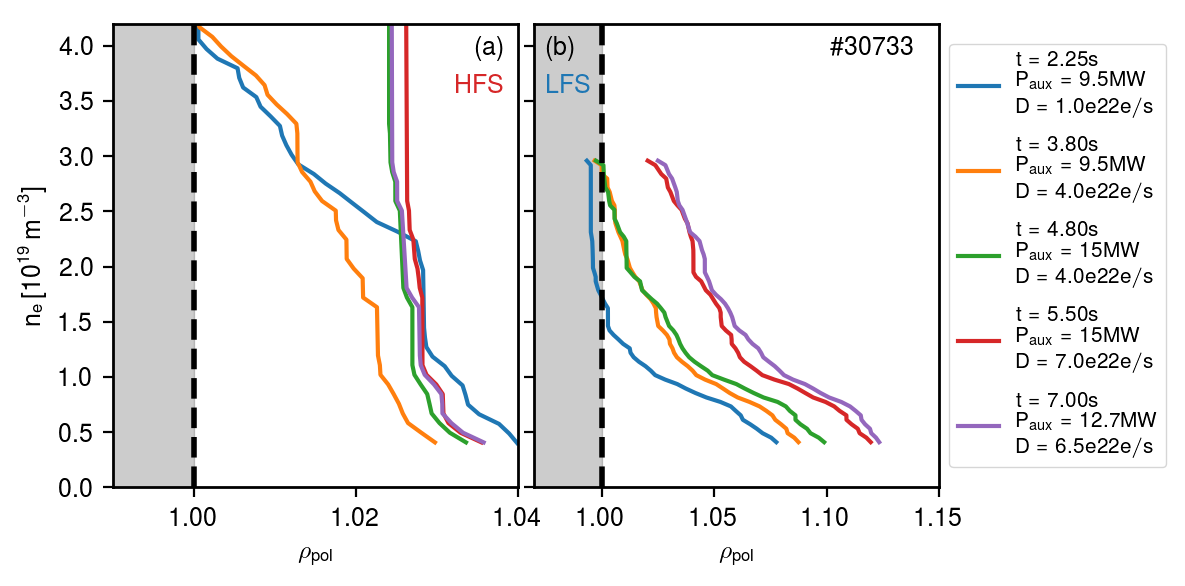

In [13]:
fig, ax = plt.subplots(figsize=(6,3),nrows=1,ncols=2,dpi=200, sharey=True)

alphaval = 0.2

ax[1].plot(al[:,0],al[:,1], label=labelstr1)
ax[1].plot(bl[:,0],bl[:,1], label=labelstr2)
ax[1].plot(cl[:,0],cl[:,1], label=labelstr3)
ax[1].plot(dl[:,0],dl[:,1], label=labelstr4)
ax[1].plot(el[:,0],el[:,1], label=labelstr5)

ax[0].plot(ah[:,0],ah[:,1], label=labelstr1)
ax[0].plot(bh[:,0],bh[:,1], label=labelstr2)
ax[0].plot(ch[:,0],ch[:,1], label=labelstr3)
ax[0].plot(dh[:,0],dh[:,1], label=labelstr4)
ax[0].plot(eh[:,0],eh[:,1], label=labelstr5)


ax[0].text(0.97,0.93,'(a)', ha='right', color='k', transform=ax[0].transAxes)
ax[0].text(0.97,0.85,'HFS', ha='right', color='C3', transform=ax[0].transAxes)
ax[1].text(0.03,0.93,'(b)', ha='left', color='k', transform=ax[1].transAxes)
ax[1].text(0.03,0.85,'LFS', ha='left', color='C0', transform=ax[1].transAxes)
ax[1].text(0.73,0.93,'\#30733', ha='left', color='k', transform=ax[1].transAxes)

ymax = 4.2
#ax[1].set_xlim([0.97, 1.11])
#ax[1].set_xticks([0.98,1.0,1.02,1.04,1.06,1.08,1.1])
ax[0].set_ylim(0, ymax)
#ax[0].set_xlim([0.97, 1.03])
ax[0].set_xlim([0.99, 1.04])

ax[0].set_ylabel(r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$')
ax[0].set_xlabel(r'$\mathrm{\rho_{pol}}$')
ax[1].set_xlabel(r'$\mathrm{\rho_{pol}}$')

ax[1].axvline(1.0, color='black', lw=2, ls='--')
ax[1].axvspan(0.9, 1., color='black', alpha=alphaval)
ax[1].set_xlim([0.97, 1.15])
ax[0].axvline(1.0, color='black', lw=2, ls='--')
ax[0].axvspan(0., 1., color='black', alpha=alphaval)

ax[1].legend(frameon=True, fontsize=7.5, loc='center left', labelspacing=0.9, bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.subplots_adjust(wspace=0.04)
plt.savefig('./Revised/Figure5.png', dpi=300)
plt.show()

### Dataframe analysis

In [10]:
#Take the old dataframe to get the TS core data
ndf = pd.DataFrame.from_csv('./SupportFiles/Pressure_Fuel_30733.csv')

/home/guimas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [11]:
ndf.head()

,Fuel,0.9,1.00,1.02,1.04,1.06,1.08,symbol
0,1.742029e+22,0.960000,0.980000,1.000000,1.020000,1.040000,1.060000,s
1,3.988460e+22,1.022619,1.339352,1.212289,1.098264,1.134769,0.978162,s
2,3.653135e+22,1.024978,1.449709,1.351923,1.242926,1.332160,1.575295,s
3,6.767685e+22,1.135431,2.243264,2.414598,2.186370,1.982248,3.119091,*
4,6.512725e+22,1.108094,2.168084,2.315115,2.197281,2.056510,3.233999,*


In [12]:
times = np.array([2.25, 3.8, 4.8, 5.5, 7.0])
fuel = ndf['Fuel']
pow = np.array([9.2, 9.2, 14.6, 14.6, 14.6])
#where to interpolate REF data
refrad = np.array([1.04,1.06,1.08])

In [14]:
lfsp = [al, bl, cl, dl, el]

rho104 = []
rho106 = []
rho108 = []

for entr in lfsp:
    lint = interp1d(entr[:,0], entr[:,1],fill_value="extrapolate")
    lndf = lint(refrad)
    rho104.append(lndf[0])
    rho106.append(lndf[1])
    rho108.append(lndf[2])
    print(lndf)

[0.87089308 0.68588936 0.36791872]
[1.06517854 0.81993792 0.56757701]
[1.1599587  0.93444618 0.75444687]
[2.25126177 1.24131701 0.95626004]
[2.29904474 1.44476735 1.03844886]


In [15]:
#Extra points from Lithium beam, taken from splines in the other notebook
rho100 = np.array([1.849, 2.671, 3.188, 4.550, np.nan])/1.849
print(rho100)
rho102 = np.array([1.133, 1.567, 1.899, 3.113, np.nan])/1.133
print(rho102)

[1.         1.44456463 1.72417523 2.46078962        nan]
[1.         1.38305384 1.6760812  2.74757282        nan]


In [16]:
#di = {'Fuel':ndf['Fuel'], '1.0':linsep_frac}
di = {'Fuel':ndf['Fuel'], '1.0':rho100, '1.02':rho102}
newdf = pd.DataFrame(data=di)

In [17]:
newdf.head()

,1.0,1.02,Fuel
0,1.000000,1.000000,1.742029e+22
1,1.444565,1.383054,3.988460e+22
2,1.724175,1.676081,3.653135e+22
3,2.460790,2.747573,6.767685e+22
4,NaN,NaN,6.512725e+22


In [18]:
nprho104 = np.array(rho104)
newdf['1.04'] = nprho104/nprho104[0]
nprho106 = np.array(rho106)
newdf['1.06'] = nprho106/nprho106[0]
nprho108 = np.array(rho108)
newdf['1.08'] = nprho108/nprho108[0]
newdf['0.9'] = ndf['0.9']
newdf['symbol'] = ndf['symbol']
#Adjust jitter
newdf['1.0'][0] = 0.98
newdf['1.04'][0] = 1.0
newdf['1.06'][0] = 1.02
newdf['1.08'][0] = 1.04

/home/guimas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/guimas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/guimas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0

In [19]:
import matplotlib.patches as mpatches

In [20]:
ndf.head()

,Fuel,0.9,1.00,1.02,1.04,1.06,1.08,symbol
0,1.742029e+22,0.960000,0.980000,1.000000,1.020000,1.040000,1.060000,s
1,3.988460e+22,1.022619,1.339352,1.212289,1.098264,1.134769,0.978162,s
2,3.653135e+22,1.024978,1.449709,1.351923,1.242926,1.332160,1.575295,s
3,6.767685e+22,1.135431,2.243264,2.414598,2.186370,1.982248,3.119091,*
4,6.512725e+22,1.108094,2.168084,2.315115,2.197281,2.056510,3.233999,*


In [21]:
newdf.head()

,1.0,1.02,Fuel,1.04,1.06,1.08,0.9,symbol
0,0.980000,1.000000,1.742029e+22,1.000000,1.020000,1.040000,0.960000,s
1,1.444565,1.383054,3.988460e+22,1.223088,1.195438,1.542670,1.022619,s
2,1.724175,1.676081,3.653135e+22,1.331919,1.362386,2.050580,1.024978,s
3,2.460790,2.747573,6.767685e+22,2.585004,1.809792,2.599107,1.135431,*
4,NaN,NaN,6.512725e+22,2.639870,2.106415,2.822495,1.108094,*


In [22]:
df = newdf[['Fuel','0.9','1.0','1.02','1.04','1.06','1.08','symbol']]
df.head()

,Fuel,0.9,1.0,1.02,1.04,1.06,1.08,symbol
0,1.742029e+22,0.960000,0.980000,1.000000,1.000000,1.020000,1.040000,s
1,3.988460e+22,1.022619,1.444565,1.383054,1.223088,1.195438,1.542670,s
2,3.653135e+22,1.024978,1.724175,1.676081,1.331919,1.362386,2.050580,s
3,6.767685e+22,1.135431,2.460790,2.747573,2.585004,1.809792,2.599107,*
4,6.512725e+22,1.108094,NaN,NaN,2.639870,2.106415,2.822495,*


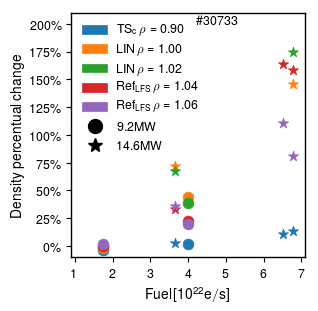

In [24]:
mkr_dict = {'s': 's', '*': '*'}
markr = ['o', 'o', '*', '*', '*']
#colors = ['red', 'green', 'blue', 'magenta', 'orange']
#colors = ['#17becf', '#bcbd22','#7f7f7f','#e377c2','#8c564b']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']
#colors = ['#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']

plt.figure(figsize=(3,3), dpi=100)

for i, ind in zip(df.columns[1:6], range(len(df.columns[1:6]))):
    for j in range(len(df['Fuel'])):
        plt.scatter(df['Fuel'][j]*1e-22, df[i][j]*100-100, s=60, marker=markr[j], c=colors[ind])

rpa = mpatches.Patch(color=colors[0], label=r'$\mathrm{TS_c\,\rho=0.90}$')
gpa = mpatches.Patch(color=colors[1], label=r'$\mathrm{LIN\,\rho=1.00}$')
ppa = mpatches.Patch(color=colors[2], label=r'$\mathrm{LIN\,\rho=1.02}$')
bpa = mpatches.Patch(color=colors[3], label=r'$\mathrm{Ref_{LFS}\,\rho=1.04}$')
mpa = mpatches.Patch(color=colors[4], label=r'$\mathrm{Ref_{LFS}\,\rho=1.06}$')
#opa = mpatches.Patch(color=colors[5], label='1.08')

circar = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='', label='9.2MW', markersize=10)
starar = plt.Line2D((0,1),(0,0), color='k', marker='*', linestyle='', label='14.6MW', markersize=10)

#plt.legend(loc='upper left', handles=[rpa,gpa,ppa,bpa,mpa,opa,circar,starar], fontsize=9, frameon=False)
plt.legend(loc='upper left', handles=[rpa,gpa,ppa,bpa,mpa,circar,starar], fontsize=9, frameon=False)
plt.ylabel('Density percentual change', fontsize=10)
plt.xlabel(r'$\mathrm{Fuel\,[10^{22}e/s]}$', fontsize=10)
plt.xlim((0.9,7.1))
plt.yticks([0,25,50,75,100,125,150,175,200],
           ['0\%','25\%','50\%','75\%','100\%','125\%','150\%','175\%','200\%'],
           fontsize=9)

plt.xticks([1,2,3,4,5,6,7], fontsize=9)
plt.text(4.2, 200, '\#30733', fontsize=9, ha='left')
#plt.show()
#plt.subplots_adjust(left=0.1, bottom=0.12, right=0.99, top=0.97, wspace=0.1, hspace=0.07)
plt.ylim(-10,210)
plt.subplots_adjust(left=0.21, bottom=0.155, right=0.99, top=0.97, wspace=0.1, hspace=0.07)
plt.savefig("./Revised/Figure6.png", dpi=300)
plt.show()